In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from important_plots import *

In [9]:
data = pd.read_csv("Soil/Soil Nutrients.csv")
data.head()

,Name,Fertility,Photoperiod,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Yield,Category_pH,Soil_Type,Season,N_Ratio,P_Ratio,K_Ratio
0,Strawberry,Moderate,Day Neutral,20.887923,747.860765,6.571548,13.091483,533.762876,91.197196,170.800381,118.670058,243.331211,20.369555,low_acidic,Loam,Summer,10.0,10.0,10.0
1,Strawberry,Moderate,Day Neutral,18.062721,711.104329,6.251806,13.063016,505.789101,91.939623,179.290364,121.020244,246.910378,20.402751,low_acidic,Loam,Spring,10.0,10.0,10.0
2,Strawberry,Moderate,Short Day Period,16.776782,774.038247,6.346916,12.945927,512.985617,91.387286,181.440732,116.936806,242.699601,19.158847,low_acidic,Loam,Summer,10.0,10.0,10.0
3,Strawberry,Moderate,Short Day Period,14.281000,665.633506,6.259598,13.318922,484.860067,91.254598,176.165282,122.233153,237.096892,20.265745,low_acidic,Loam,Summer,10.0,10.0,10.0
4,Strawberry,Moderate,Day Neutral,21.444490,806.531455,6.384368,13.312915,512.747307,92.354829,182.935334,126.088234,243.880364,20.397336,low_acidic,Loam,Spring,10.0,10.0,10.0


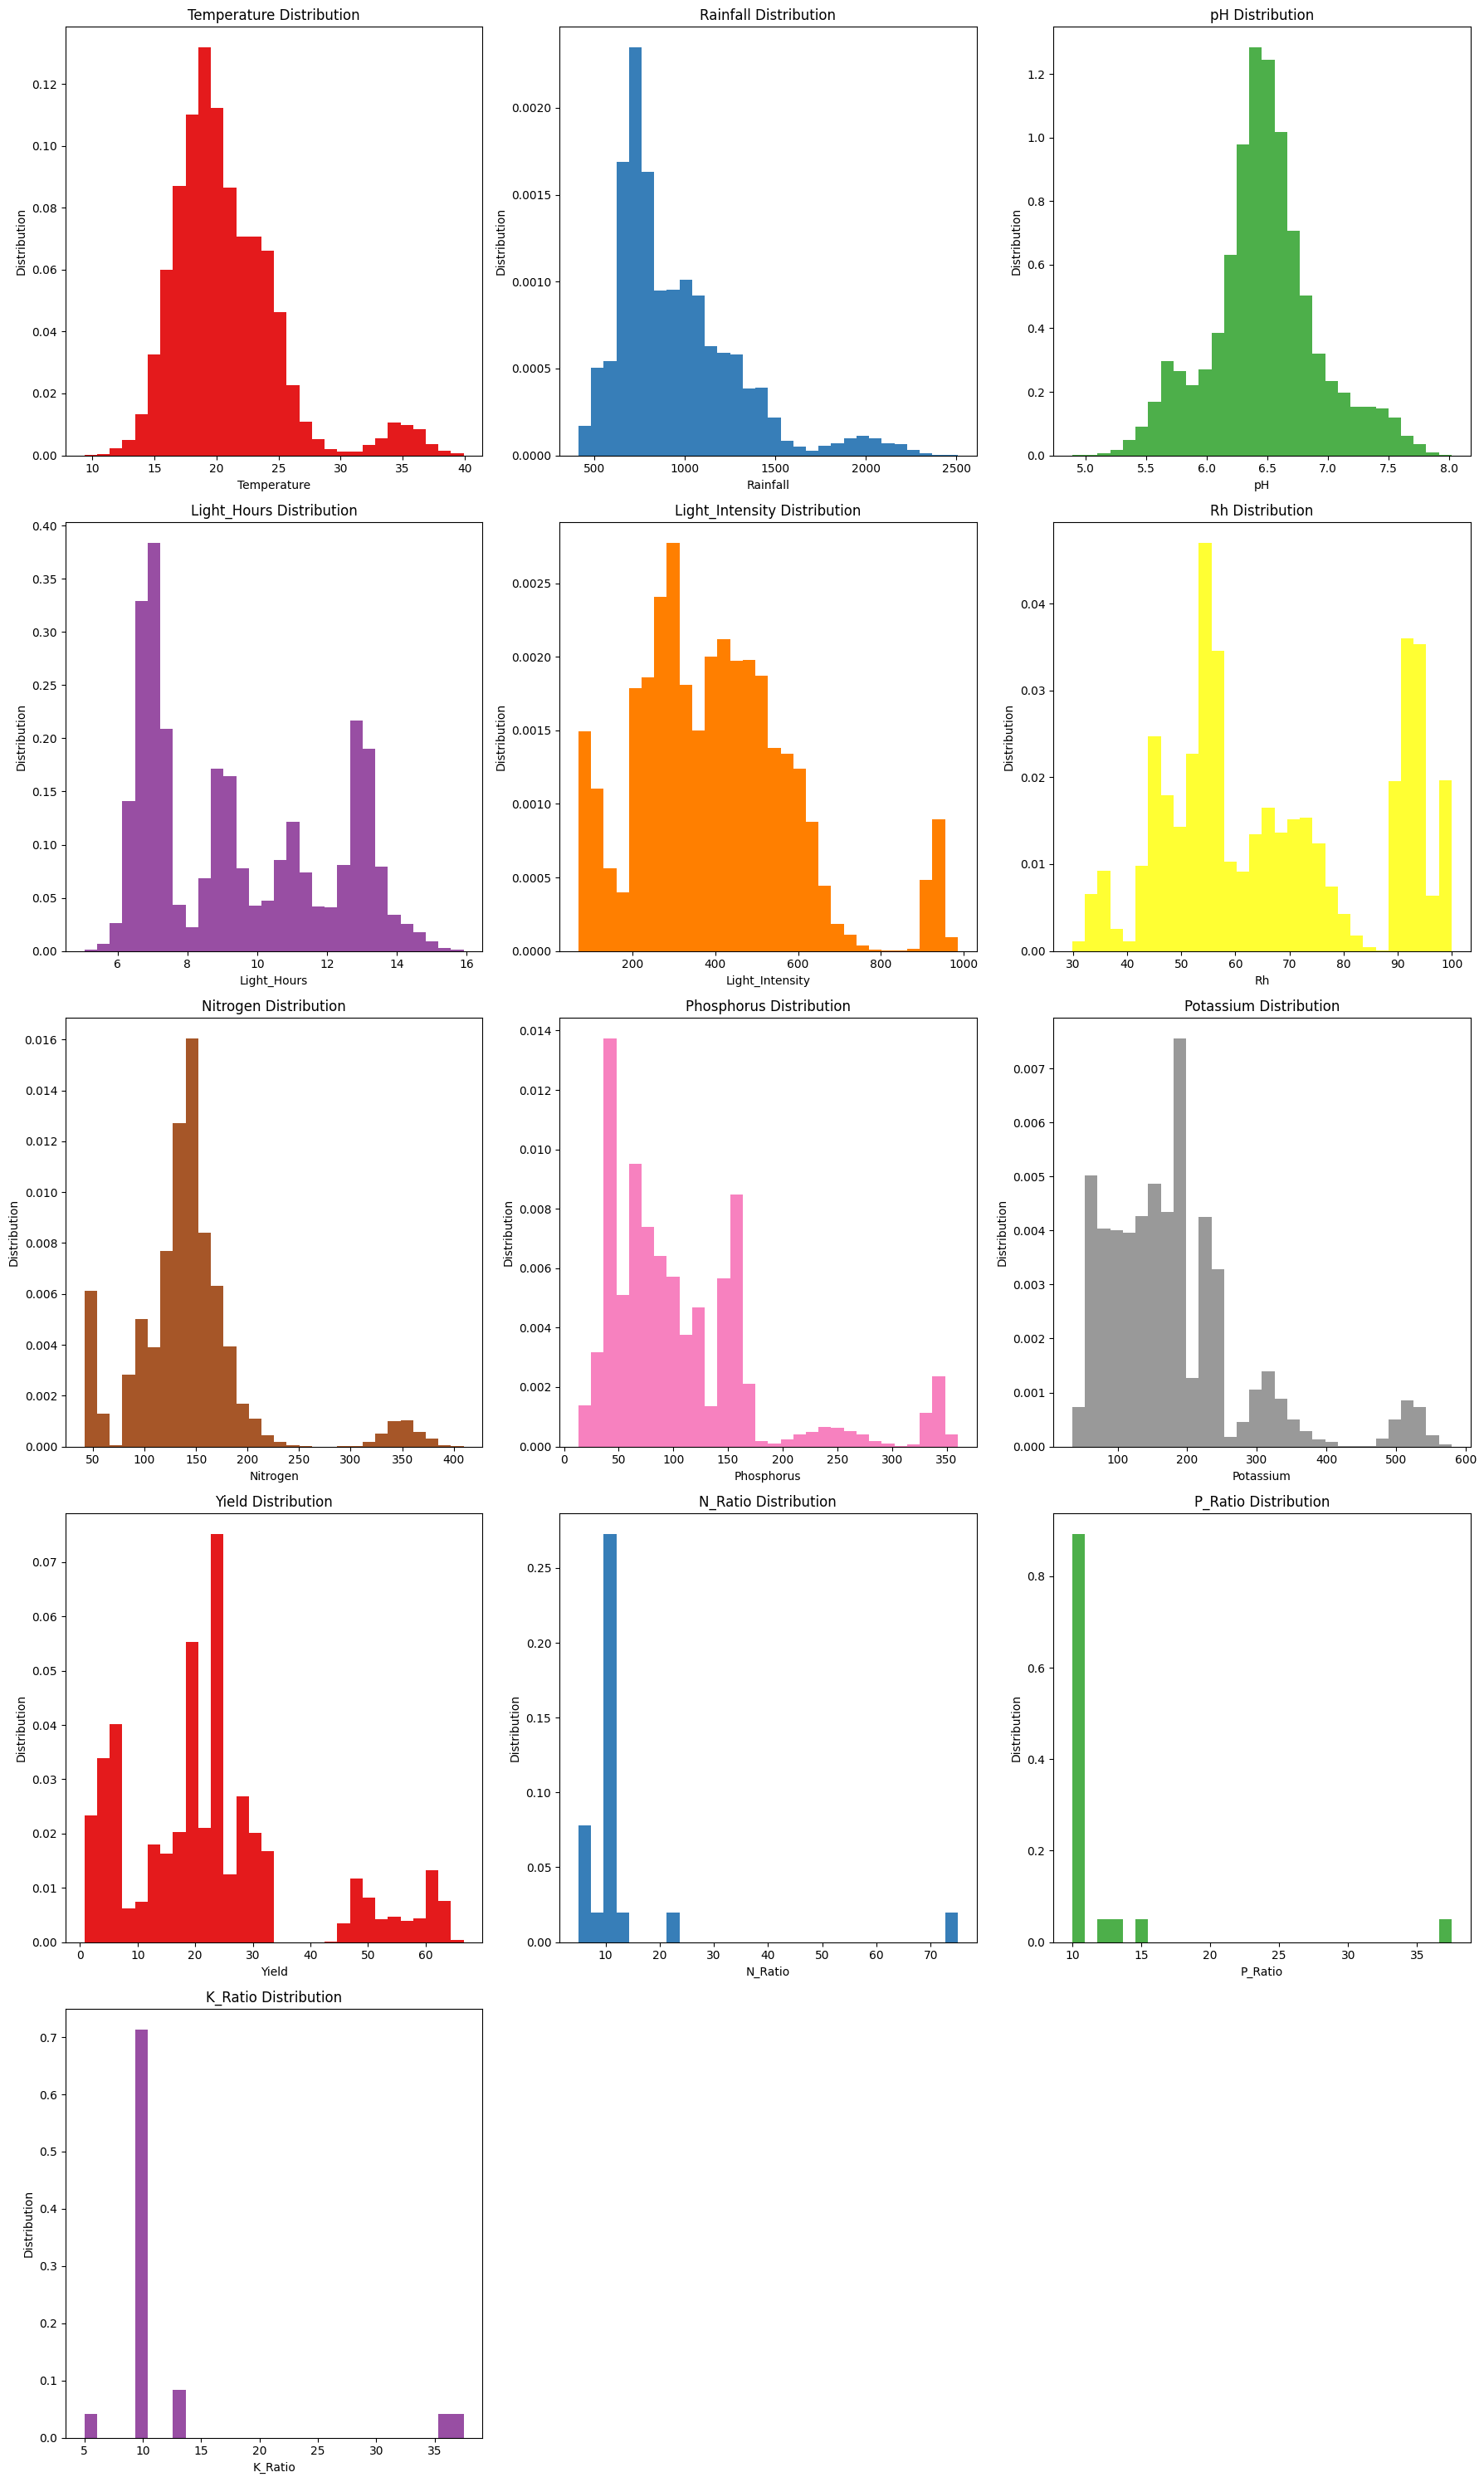

In [10]:
numeric_columns = data.select_dtypes(include=['number'])
plot_features(data, *numeric_columns)

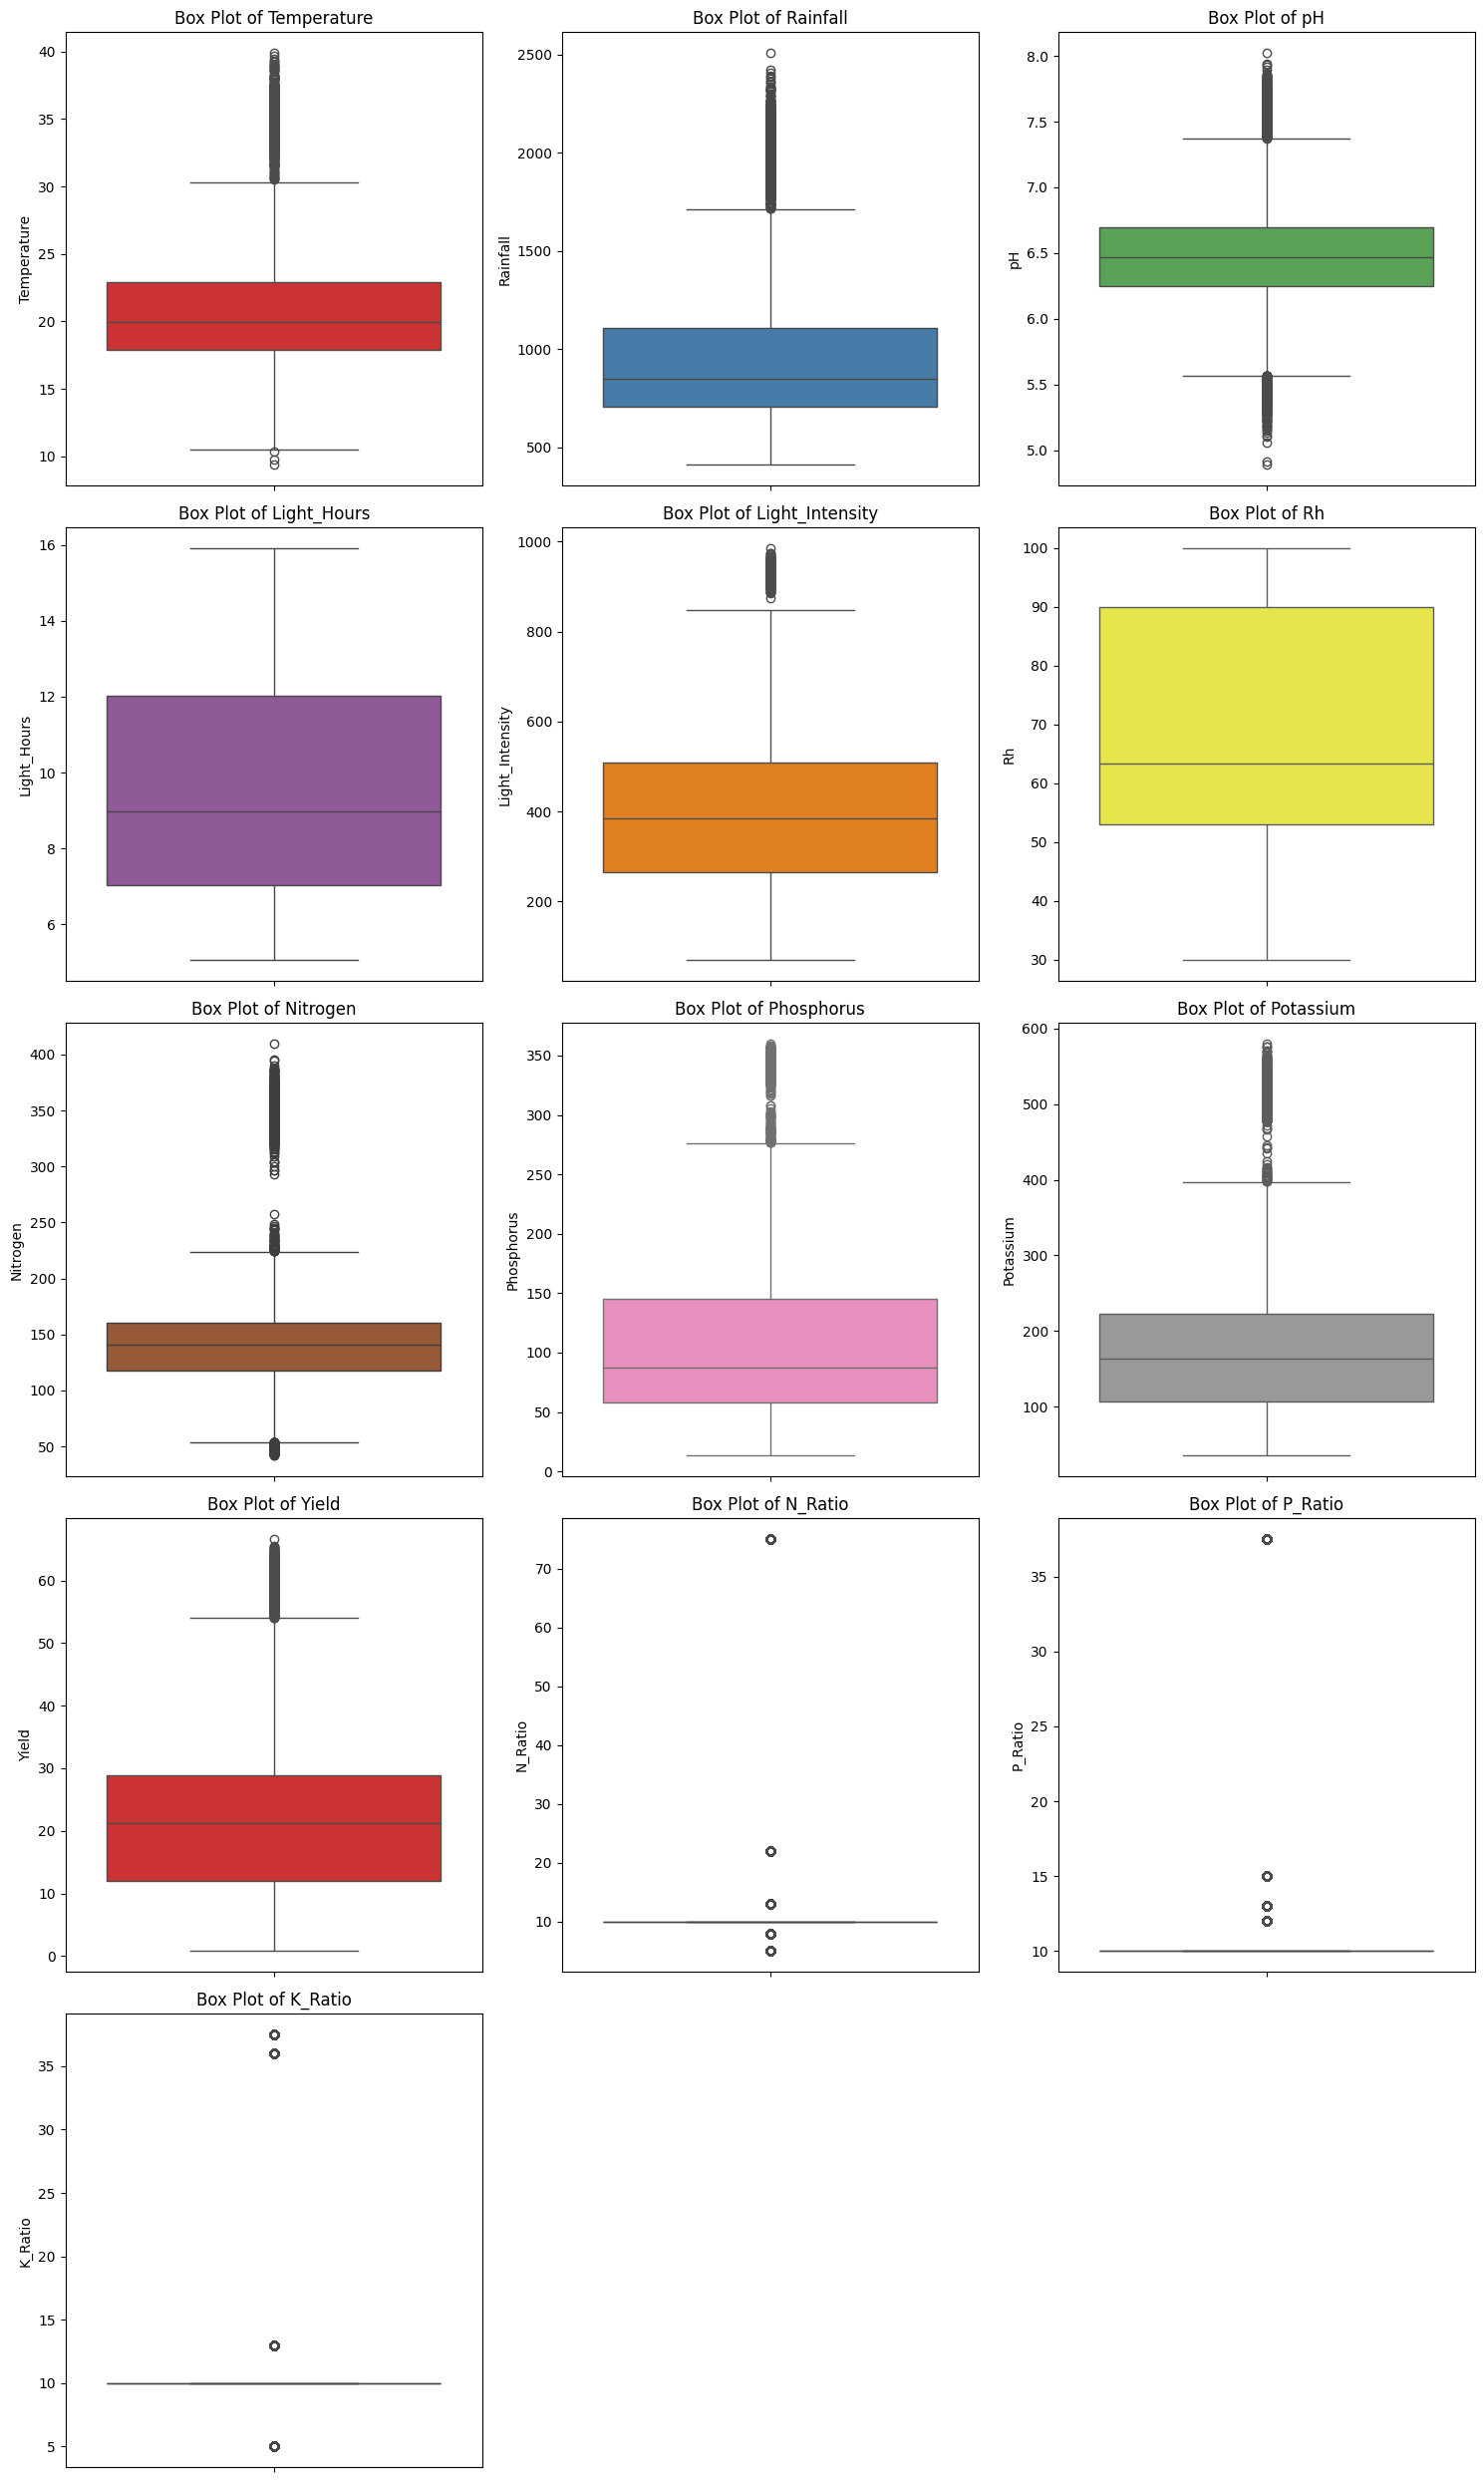

In [11]:
box_plot(data, *numeric_columns)

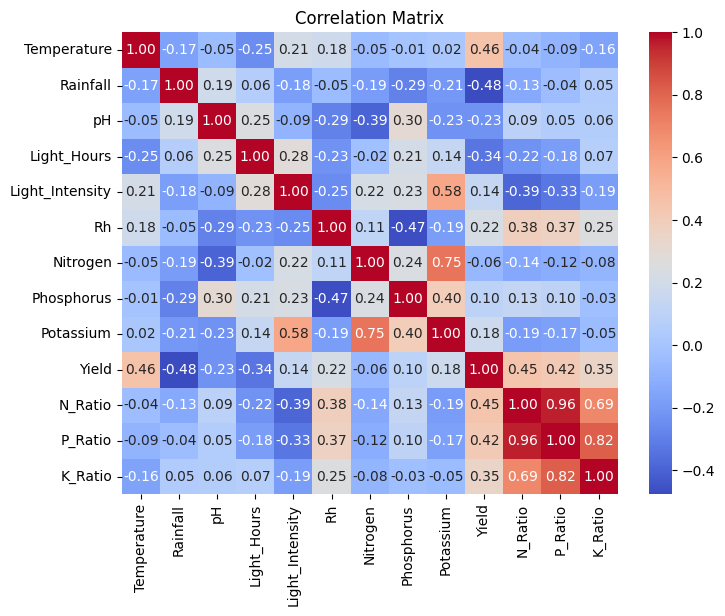

In [14]:
correlation(data, *numeric_columns)

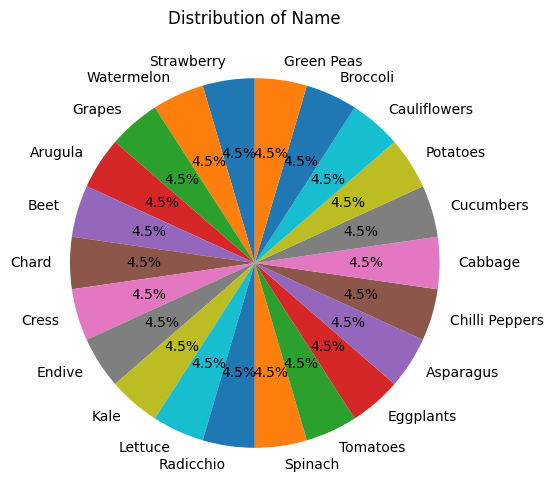

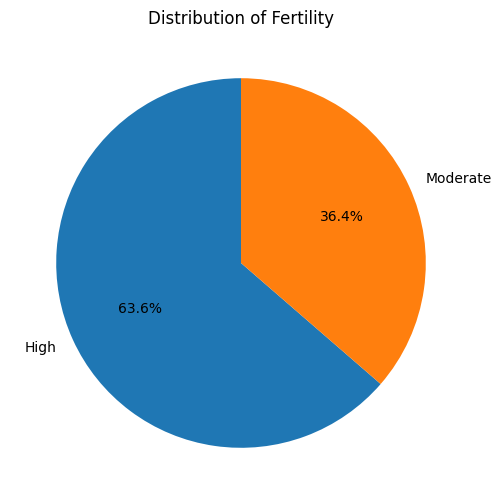

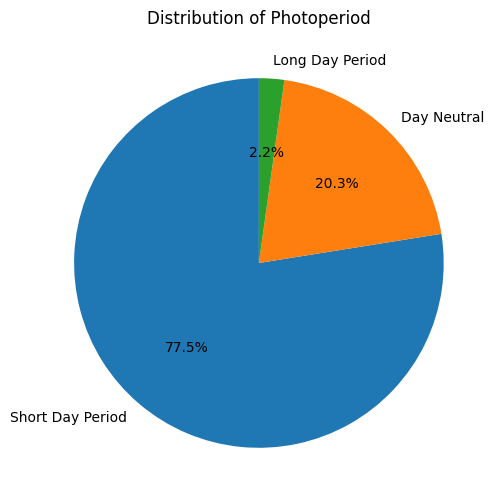

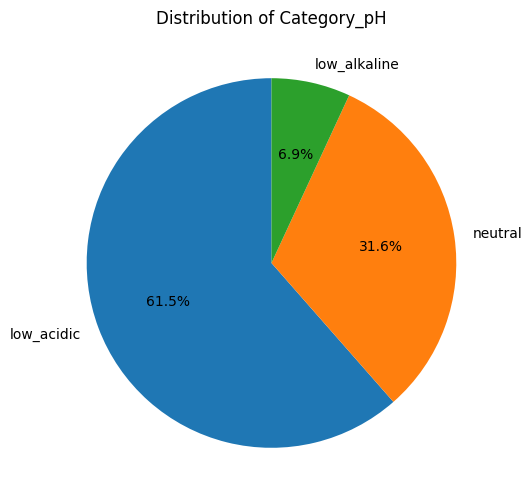

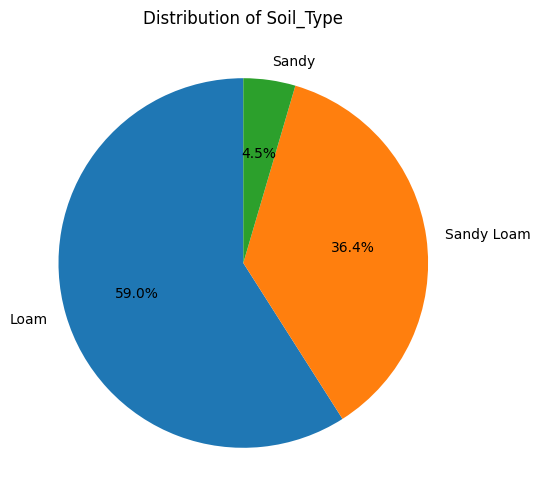

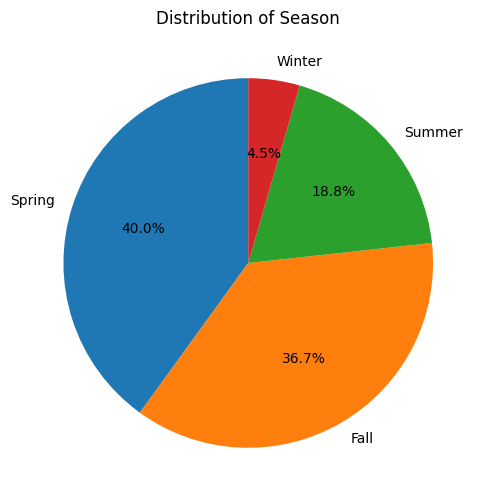

In [12]:
string_columns = data.select_dtypes(include=['object']).columns

for column in string_columns:
    pie_plot(data, column)

***Code***

In [71]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [72]:
df = pd.read_csv("Soil/Soil Nutrients.csv")
df.head()

,Name,Fertility,Photoperiod,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Yield,Category_pH,Soil_Type,Season,N_Ratio,P_Ratio,K_Ratio
0,Strawberry,Moderate,Day Neutral,20.887923,747.860765,6.571548,13.091483,533.762876,91.197196,170.800381,118.670058,243.331211,20.369555,low_acidic,Loam,Summer,10.0,10.0,10.0
1,Strawberry,Moderate,Day Neutral,18.062721,711.104329,6.251806,13.063016,505.789101,91.939623,179.290364,121.020244,246.910378,20.402751,low_acidic,Loam,Spring,10.0,10.0,10.0
2,Strawberry,Moderate,Short Day Period,16.776782,774.038247,6.346916,12.945927,512.985617,91.387286,181.440732,116.936806,242.699601,19.158847,low_acidic,Loam,Summer,10.0,10.0,10.0
3,Strawberry,Moderate,Short Day Period,14.281000,665.633506,6.259598,13.318922,484.860067,91.254598,176.165282,122.233153,237.096892,20.265745,low_acidic,Loam,Summer,10.0,10.0,10.0
4,Strawberry,Moderate,Day Neutral,21.444490,806.531455,6.384368,13.312915,512.747307,92.354829,182.935334,126.088234,243.880364,20.397336,low_acidic,Loam,Spring,10.0,10.0,10.0


In [73]:
# Identify categorical columns (strings)
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the transformed data
df.head()

,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Yield,...,Fertility_Moderate,Photoperiod_Long Day Period,Photoperiod_Short Day Period,Category_pH_low_alkaline,Category_pH_neutral,Soil_Type_Sandy,Soil_Type_Sandy Loam,Season_Spring,Season_Summer,Season_Winter
0,20.887923,747.860765,6.571548,13.091483,533.762876,91.197196,170.800381,118.670058,243.331211,20.369555,...,True,False,False,False,False,False,False,False,True,False
1,18.062721,711.104329,6.251806,13.063016,505.789101,91.939623,179.290364,121.020244,246.910378,20.402751,...,True,False,False,False,False,False,False,True,False,False
2,16.776782,774.038247,6.346916,12.945927,512.985617,91.387286,181.440732,116.936806,242.699601,19.158847,...,True,False,True,False,False,False,False,False,True,False
3,14.281000,665.633506,6.259598,13.318922,484.860067,91.254598,176.165282,122.233153,237.096892,20.265745,...,True,False,True,False,False,False,False,False,True,False
4,21.444490,806.531455,6.384368,13.312915,512.747307,92.354829,182.935334,126.088234,243.880364,20.397336,...,True,False,False,False,False,False,False,True,False,False


In [115]:
targets = ['K_Ratio', 'N_Ratio', 'P_Ratio']
X = df.drop(targets, axis=1).values  # Features
y = df[targets].values  # Target

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [116]:
class KNPModel(nn.Module):
    def __init__(self, input_dim):
        super(KNPModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)  # First layer (input -> 64 units)
        self.fc2 = nn.Linear(64, 32)         # Second layer (64 -> 32 units)
        self.fc3 = nn.Linear(32, 3)          # Output layer (32 -> 3 units, one for K, N, P)

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Apply ReLU activation after the first layer
        x = torch.relu(self.fc2(x))  # Apply ReLU activation after the second layer
        x = self.fc3(x)              # Output layer
        return x

In [120]:
input_dim = X_train.shape[1]  # Number of features in the input
model = KNPModel(input_dim)

# Define the loss function (Mean Squared Error for regression)
criterion = nn.MSELoss()

# Define the optimizer (Adam)
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [121]:
# Training the model
num_epochs = 1000  # Set the number of epochs
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    
    # Convert the data to torch tensors
    inputs = torch.tensor(X_train, dtype=torch.float32)
    targets = torch.tensor(y_train, dtype=torch.float32)
    
    # Forward pass: compute predicted outputs by passing inputs to the model
    outputs = model(inputs)
    
    # Compute the loss
    loss = criterion(outputs, targets)
    
    # Zero the gradients before backward pass
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to model parameters
    loss.backward()
    
    # Update the model parameters
    optimizer.step()
    
    # Print the loss every 10 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: 0.3458
Epoch [200/1000], Loss: 0.1174
Epoch [300/1000], Loss: 0.0803
Epoch [400/1000], Loss: 0.0598
Epoch [500/1000], Loss: 0.0457
Epoch [600/1000], Loss: 0.0350
Epoch [700/1000], Loss: 0.0266
Epoch [800/1000], Loss: 0.0202
Epoch [900/1000], Loss: 0.0154
Epoch [1000/1000], Loss: 0.0118


In [124]:
# Set model to evaluation mode
model.eval()

# Convert the test data to torch tensors
inputs = torch.tensor(X_test, dtype=torch.float32)
targets = torch.tensor(y_test, dtype=torch.float32)

# Disable gradient calculation for evaluation
with torch.no_grad():
    # Forward pass
    outputs = model(inputs)

    # Example: compute performance metrics
    predicted = outputs.numpy()
    true = targets.numpy()

    # If it's regression, calculate RMSE or R^2
    rmse = mean_squared_error(true, predicted)
    r2 = r2_score(true, predicted)

    print(f'RMSE: {rmse:.4f}')
    print(f'R^2 Score: {r2:.4f}')

RMSE: 0.0201
R^2 Score: 0.9997


In [125]:
torch.save(model, "Soil_data_model.pth")